# Vizualisation

**Import**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# --- Load data from Our World in Data (cases & deaths weekly) ---
url_cases = "https://ourworldindata.org/grapher/weekly-covid-cases.csv?v=1&csvType=full&useColumnShortNames=true"
url_deaths = "https://ourworldindata.org/grapher/weekly-covid-deaths.csv?v=1&csvType=full&useColumnShortNames=true"

cases_df = pd.read_csv(url_cases, storage_options={'User-Agent': 'Our World In Data data fetch/1.0'})
deaths_df = pd.read_csv(url_deaths, storage_options={'User-Agent': 'Our World In Data data fetch/1.0'})

# --- Keep only Portugal and USA ---
countries = ["Portugal", "United States"]
cases_df = cases_df[cases_df["Entity"].isin(countries)]
deaths_df = deaths_df[deaths_df["Entity"].isin(countries)]

# Merge cases and deaths
df = pd.merge(cases_df, deaths_df, on=["Entity", "Day"], suffixes=("_cases", "_deaths"))
df["Day"] = pd.to_datetime(df["Day"])

# --- Define vaccination start dates (approx from OWID data) ---
vax_start = {
    "Portugal": ("2020-12-27"),
    "United States": ("2020-12-14")
}







**Plot 1: Portugal (Cases & Deaths over time)**

ValueError: time data "purple" doesn't match format "%Y-%m-%d", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

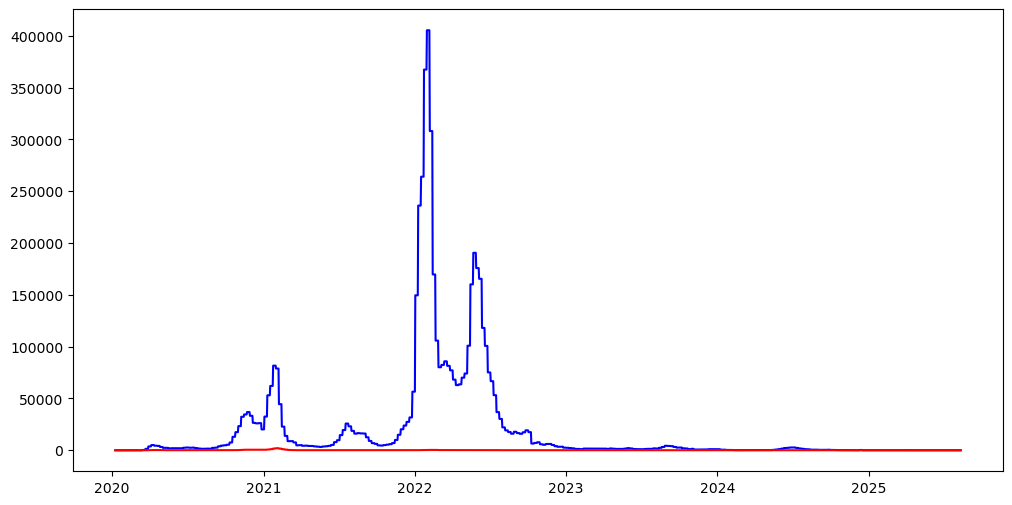

In [43]:
plt.figure(figsize=(12,6))
pt_df = df[df["Entity"]=="Portugal"]
plt.plot(pt_df["Day"], pt_df["weekly_cases"], label="Weekly Cases", color="blue")
plt.plot(pt_df["Day"], pt_df["weekly_deaths"], label="Weekly Deaths", color="red")
plt.axvline(pd.to_datetime(vax_start["Portugal"]), color="green", linestyle="--", label="Vaccination Start")
plt.title("COVID-19 in Portugal: Weekly Cases & Deaths (with Vaccination Start)")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

**Plot 2: USA (Cases & Deaths over time)**

In [ ]:
plt.figure(figsize=(12,6))
us_df = df[df["Entity"]=="United States"]
plt.plot(us_df["Day"], us_df["weekly_cases"], label="Weekly Cases", color="blue")
plt.plot(us_df["Day"], us_df["weekly_deaths"], label="Weekly Deaths", color="red")
plt.axvline(pd.to_datetime(vax_start["United States"]), color="green", linestyle="--", label="Vaccination Start")
plt.title("COVID-19 in USA: Weekly Cases & Deaths (with Vaccination Start)")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

**Plot 3: Cases (Portugal and USA)** 

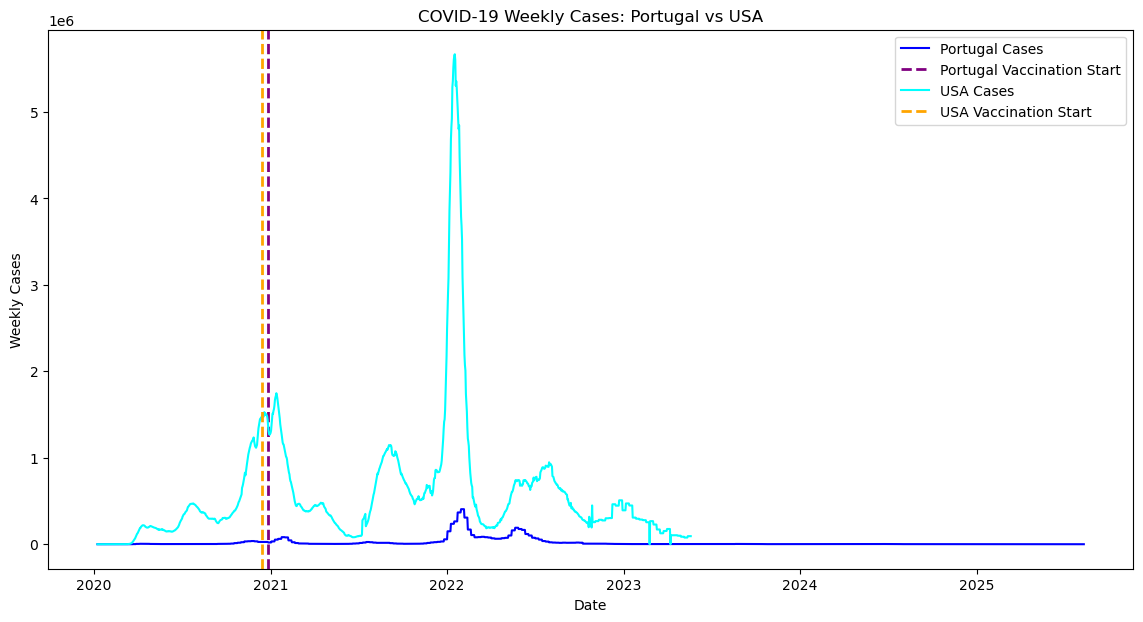

In [28]:
# --- Define vaccination start dates (approx from OWID data) ---
vax_start = {
    "Portugal": ("2020-12-27", "purple"),
    "United States": ("2020-12-14", "orange")
}


plt.figure(figsize=(14,7))
# Portugal
pt_df = df[df["Entity"]=="Portugal"]
plt.plot(pt_df["Day"], pt_df["weekly_cases"], label="Portugal Cases", color="blue")
plt.axvline(pd.to_datetime(vax_start["Portugal"][0]), color=vax_start["Portugal"][1],
            linestyle="--", linewidth=2, label="Portugal Vaccination Start")
# USA
us_df = df[df["Entity"]=="United States"]
plt.plot(us_df["Day"], us_df["weekly_cases"], label="USA Cases", color="cyan")
plt.axvline(pd.to_datetime(vax_start["United States"][0]), color=vax_start["United States"][1],
            linestyle="--", linewidth=2, label="USA Vaccination Start")

plt.title("COVID-19 Weekly Cases: Portugal vs USA")
plt.xlabel("Date")
plt.ylabel("Weekly Cases")
plt.legend()
plt.show()

**Plot 4: Deaths (Portugal and USA)** 

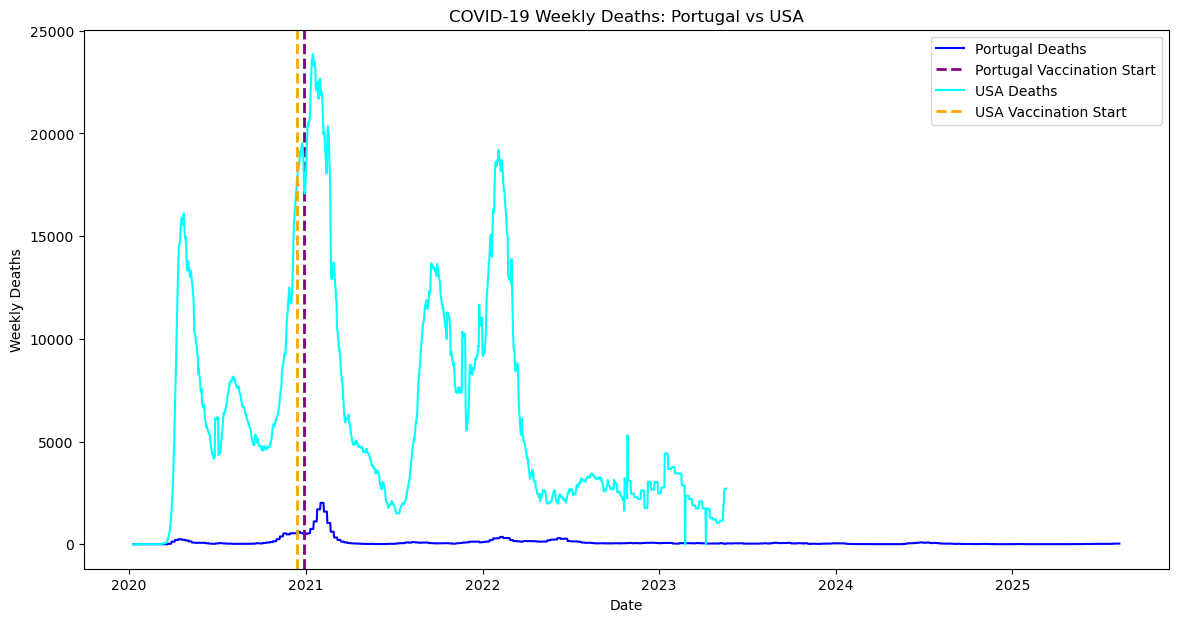

In [27]:
plt.figure(figsize=(14,7))
# Portugal
plt.plot(pt_df["Day"], pt_df["weekly_deaths"], label="Portugal Deaths", color="blue")
plt.axvline(pd.to_datetime(vax_start["Portugal"][0]), color=vax_start["Portugal"][1],
            linestyle="--", linewidth=2, label="Portugal Vaccination Start")
# USA
plt.plot(us_df["Day"], us_df["weekly_deaths"], label="USA Deaths", color="cyan")
plt.axvline(pd.to_datetime(vax_start["United States"][0]), color=vax_start["United States"][1],
            linestyle="--", linewidth=2, label="USA Vaccination Start")

plt.title("COVID-19 Weekly Deaths: Portugal vs USA")
plt.xlabel("Date")
plt.ylabel("Weekly Deaths")
plt.legend()
plt.show()